In [2]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt

In [3]:
key = "GFEKR71U464SVPI7"

In [4]:
comp = 'IBM'

# https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=demo

req = requests.get(f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={comp}&interval=5min&outputsize=full&apikey={key}').json()

print(req)

{'Meta Data': {'1. Information': 'Intraday (5min) open, high, low, close prices and volume', '2. Symbol': 'IBM', '3. Last Refreshed': '2022-07-15 20:00:00', '4. Interval': '5min', '5. Output Size': 'Full size', '6. Time Zone': 'US/Eastern'}, 'Time Series (5min)': {'2022-07-15 20:00:00': {'1. open': '140.5000', '2. high': '140.5000', '3. low': '140.5000', '4. close': '140.5000', '5. volume': '106'}, '2022-07-15 19:50:00': {'1. open': '140.1000', '2. high': '140.1000', '3. low': '140.1000', '4. close': '140.1000', '5. volume': '205'}, '2022-07-15 19:25:00': {'1. open': '140.1000', '2. high': '140.1000', '3. low': '140.1000', '4. close': '140.1000', '5. volume': '100'}, '2022-07-15 18:35:00': {'1. open': '140.0700', '2. high': '140.1400', '3. low': '140.0400', '4. close': '140.1400', '5. volume': '2435'}, '2022-07-15 18:20:00': {'1. open': '140.0700', '2. high': '140.0700', '3. low': '140.0700', '4. close': '140.0700', '5. volume': '355'}, '2022-07-15 18:15:00': {'1. open': '139.9000', '2

In [5]:
meta = req['Meta Data']
df = pd.DataFrame(req['Time Series (5min)'], dtype=float).transpose()

df = df.reindex(index=df.index[::-1])
df.reset_index(level=0, inplace=True)

df = df.rename({
    'index': 'date',
    '1. open': 'open',
    '2. high': 'high',
    '3. low': 'low',
    '4. close': 'close',
    '5. adjusted close': 'adjusted_close',
    '6. volume': 'volume',
    '7. dividend amount': 'dividend_amount',
    '8. split coefficient': 'split_coefficient'
}, axis=1)

df['date'] = pd.to_datetime(df['date'])

In [27]:
print(df.head(10))

                 date      open      high       low     close  5. volume
0 2022-06-17 04:40:00  135.8600  135.8700  135.8600  135.8700      719.0
1 2022-06-17 07:25:00  136.2700  136.2700  136.2700  136.2700      110.0
2 2022-06-17 08:10:00  136.2500  136.2500  136.2500  136.2500      100.0
3 2022-06-17 08:20:00  136.2500  136.2500  136.2500  136.2500      173.0
4 2022-06-17 08:30:00  136.2499  136.2499  136.2499  136.2499      105.0
5 2022-06-17 08:35:00  136.2500  136.2500  136.2499  136.2499      454.0
6 2022-06-17 08:45:00  136.0000  136.0000  135.7400  135.7400      827.0
7 2022-06-17 09:00:00  135.7400  136.2500  135.7400  136.2500      827.0
8 2022-06-17 09:05:00  135.5097  135.5097  135.5097  135.5097      500.0
9 2022-06-17 09:15:00  135.5000  135.5000  135.5000  135.5000      270.0


In [6]:
df = df[((df['date'] >= pd.to_datetime('2020-06-15')) & (df['date'] <= pd.to_datetime('2022-06-17')))]

In [9]:
df['ma_200'] = df['close'].rolling(20).mean()

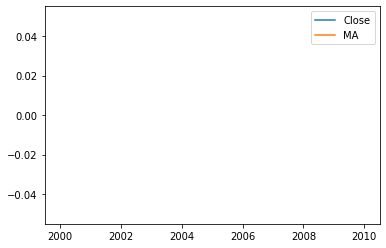

In [10]:
#plt.figure(figsize=(12, 5))
#plt.xticks(rotation=45)

plt.plot(df['date'], df['close'], label='Close')
plt.plot(df['date'], df['ma_200'], label='MA')

plt.legend()
plt.show()

In [ ]:
period = 20

df['ma_20'] = df['close'].rolling(period).mean()
df['std'] = df['close'].rolling(period).std()

df['ub'] = df['ma_20'] + (2 * df['std'])
df['lb'] = df['ma_20'] - (2 * df['std'])